<a href="https://colab.research.google.com/github/IshratJahan1623/Intro-to-Machine-Learning/blob/main/Homeqork_3/HW-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem 1**

Evaluation Metrics:

Train Accuracy: 0.7915
Model Accuracy(validation): 0.7338
Precision value: 0.6429
Recall: 0.5094
F1 Score: 0.5684

Confusion Matrix:
array([[86, 15],
       [26, 27]])


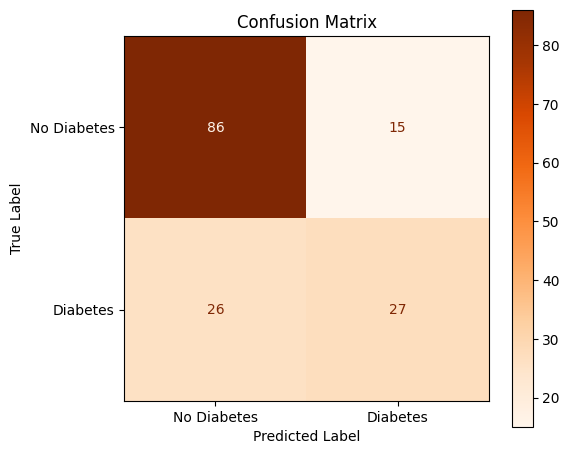

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Diabetes dataset from github
data_url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/diabetes.csv"
diabetes_df = pd.read_csv(data_url)

# Separate input and target
features = diabetes_df.drop('Outcome', axis=1)
target = diabetes_df['Outcome']

# Split into 80% training and 20% validation
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Standard scaling for feature normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_set)
X_test_norm = scaler.transform(X_test_set)

# Train a logistic regression classifier
model_logreg = LogisticRegression(random_state=100, max_iter=1500)
model_logreg.fit(X_train_norm, y_train_set)

# Predict the target for the test set
y_predicted = model_logreg.predict(X_test_norm)

# >>> Added: train/validation accuracy and percent-point difference
y_train_pred = model_logreg.predict(X_train_norm)
train_acc = accuracy_score(y_train_set, y_train_pred)
val_acc = accuracy_score(y_test_set, y_predicted)
acc_gap_pp = (train_acc - val_acc) * 100  # percentage points

print("Evaluation Metrics:")
print(f"\nTrain Accuracy: {train_acc:.4f}")
# Compute evaluation metrics
prec = precision_score(y_test_set, y_predicted)
rec = recall_score(y_test_set, y_predicted)
f1_val = f1_score(y_test_set, y_predicted)

# Display performance metrics
print(f"Model Accuracy(validation): {val_acc:.4f}")
print(f"Precision value: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1_val:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_set, y_predicted)
print("\nConfusion Matrix:")
print(repr(conf_matrix))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=['No Diabetes', 'Diabetes']
)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Oranges', colorbar=True)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()


## **Problem 2a**

Evaluation Metrics:

Training Accuracy: 0.9934
Model Accuracy(Validation): 0.9737
Precision value: 0.9559
Recall: 1.0000
F1 Score: 0.9774

Confusion Matrix:
array([[46,  3],
       [ 0, 65]])


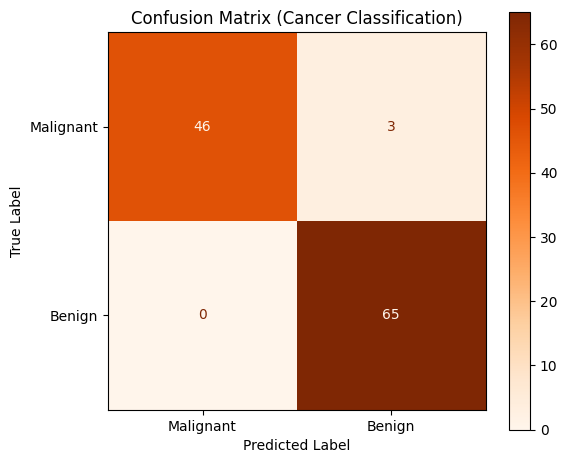

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Breast Cancer dataset from sklearn
cancer_data = load_breast_cancer()
diabetes_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
diabetes_df['Outcome'] = cancer_data.target  # target: 0 = malignant, 1 = benign

# Separate predictors (X) and target labels (y)
features = diabetes_df.drop('Outcome', axis=1)
target = diabetes_df['Outcome']

# Split into 80% training and 20% testing data
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Apply standard scaling for feature normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_set)
X_test_norm = scaler.transform(X_test_set)

# Train a logistic regression classifier
model_logreg = LogisticRegression(random_state=100, max_iter=1500)
model_logreg.fit(X_train_norm, y_train_set)

# Predict the target for the test set
y_predicted = model_logreg.predict(X_test_norm)

# >>> Added: Train and Validation Accuracy with percent difference
y_train_pred = model_logreg.predict(X_train_norm)
train_acc = accuracy_score(y_train_set, y_train_pred)
val_acc = accuracy_score(y_test_set, y_predicted)
acc_gap_pp = (train_acc - val_acc) * 100  # percentage points

print("Evaluation Metrics:")
print(f"\nTraining Accuracy: {train_acc:.4f}")
# Compute evaluation metrics
prec = precision_score(y_test_set, y_predicted)
rec = recall_score(y_test_set, y_predicted)
f1_val = f1_score(y_test_set, y_predicted)

# Display performance metrics
print(f"Model Accuracy(Validation): {val_acc:.4f}")
print(f"Precision value: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1_val:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_set, y_predicted)
print("\nConfusion Matrix:")
print(repr(conf_matrix))

# Plot confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=['Malignant', 'Benign']
)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Oranges', colorbar=True)
ax.set_title('Confusion Matrix (Cancer Classification)')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()


##**Problem 2b**

Evaluation Metrics:

Training Accuracy: 0.9253
Model Accuracy(Validation): 0.9386
Precision value: 0.9677
Recall: 0.9231
F1 Score: 0.9449

Confusion Matrix:
array([[47,  2],
       [ 5, 60]])


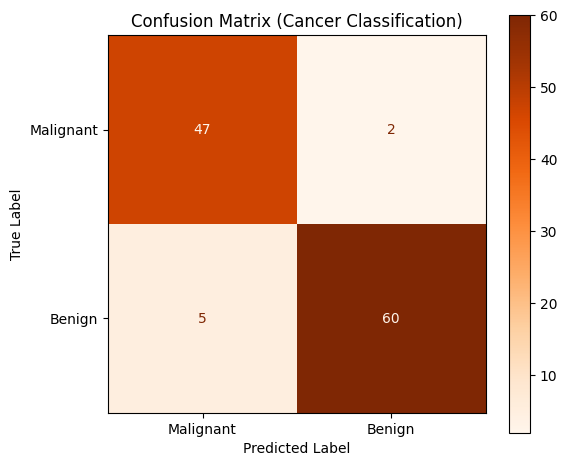

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.utils.class_weight import compute_class_weight

# Breast Cancer dataset from sklearn
cancer_data = load_breast_cancer()
diabetes_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
diabetes_df['Outcome'] = cancer_data.target  # target: 0 = malignant, 1 = benign

# Separate predictors (X) and target labels (y)
features = diabetes_df.drop('Outcome', axis=1)
target = diabetes_df['Outcome']

# Split into 80% training and 20% testing data
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    features, target, test_size=0.2, random_state=100
)

# Apply standard scaling for feature normalization
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_set)
X_test_norm = scaler.transform(X_test_set)

# Train a logistic regression classifier with L1 penalty
model_logreg = LogisticRegression(
    random_state=100,
    max_iter=1500,
    penalty='l1',
    C=0.01,                 # inverse of regularization strength
    solver='liblinear'
)
model_logreg.fit(X_train_norm, y_train_set)

# Predict the target for the test set
y_predicted = model_logreg.predict(X_test_norm)

# >>> Added: Train and Validation Accuracy with percent difference
y_train_pred = model_logreg.predict(X_train_norm)
train_acc = accuracy_score(y_train_set, y_train_pred)
val_acc = accuracy_score(y_test_set, y_predicted)
acc_gap_pp = (train_acc - val_acc) * 100  # percent difference in accuracy

print("Evaluation Metrics:")
print(f"\nTraining Accuracy: {train_acc:.4f}")

# Compute evaluation metrics
prec = precision_score(y_test_set, y_predicted)
rec = recall_score(y_test_set, y_predicted)
f1_val = f1_score(y_test_set, y_predicted)

# Display performance metrics
print(f"Model Accuracy(Validation): {val_acc:.4f}")
print(f"Precision value: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1_val:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_set, y_predicted)
print("\nConfusion Matrix:")
print(repr(conf_matrix))

# Plot confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=['Malignant', 'Benign']
)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Oranges', colorbar=True)
ax.set_title('Confusion Matrix (Cancer Classification)')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.tight_layout()
plt.show()
